In [48]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
import time
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [49]:
# List of subfolders
subfolders = ["beyza", "zeynep", "ezgi"]

# Set the path to the root directory
root_path = r"C:\Users\HP\Desktop\project"  # the root directory where the images are stored

images = []
labels = []

valid_extensions = {".jpg", ".jpeg", ".png"}

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)

    for folder_name in os.listdir(subfolder_path):
        folder_path = os.path.join(subfolder_path, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if any(file_name.lower().endswith(ext) for ext in valid_extensions):
                    image_path = os.path.join(folder_path, file_name)
                    label = file_name.split('_')[2]
                    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)                    
                    if img is None:
                        print(f"Failed to load image: {image_path}")
                    else:
                        img = cv2.resize(img, (64, 64))
                        img = np.expand_dims(img, axis=-1)
                        images.append(img)
                        labels.append(label)

In [50]:
images = np.array(images)
labels = np.array(labels)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

images = images / 255.0

In [51]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [42]:
data_gen = ImageDataGenerator(
    rotation_range=20,       # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,   # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    shear_range=0.2,         # apply shearing transformations
    zoom_range=0.2,          # randomly zooming inside pictures
    fill_mode='nearest'      # strategy for filling in newly created pixels
)
augmented_data = data_gen.flow(X_train, y_train, batch_size=32)


In [52]:
# Define the CNN model with glorot_uniform initializer
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [53]:
# Define the optimizer with a custom learning rate (e.g., 0.001)
custom_learning_rate = 0.001
custom_optimizer = Adam(learning_rate=custom_learning_rate)

In [31]:
# Create an image data generator
datagen = ImageDataGenerator(rescale=1./255)

In [54]:
# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Create a generator for training data
train_generator = datagen.flow(X_train, y_train, batch_size=32)

# Create a generator for validation data
validation_generator = datagen.flow(X_test, y_test, batch_size=32)

In [56]:
# Record the start time before compilation
start_time = time.time()

In [58]:
# Train the model
history_2 = model.fit(X_train,y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/40
264/264 [==============================] - 87s 323ms/step - loss: 5.0857 - accuracy: 0.0099 - val_loss: 4.9128 - val_accuracy: 0.0119
Epoch 2/40
264/264 [==============================] - 81s 308ms/step - loss: 4.7740 - accuracy: 0.0276 - val_loss: 4.6218 - val_accuracy: 0.0437
Epoch 3/40
264/264 [==============================] - 83s 313ms/step - loss: 4.2991 - accuracy: 0.0748 - val_loss: 4.1231 - val_accuracy: 0.1033
Epoch 4/40
264/264 [==============================] - 83s 315ms/step - loss: 3.6034 - accuracy: 0.1594 - val_loss: 6.4728 - val_accuracy: 0.0314
Epoch 5/40
264/264 [==============================] - 84s 317ms/step - loss: 3.1559 - accuracy: 0.2297 - val_loss: 3.1886 - val_accuracy: 0.2122
Epoch 6/40
264/264 [==============================] - 83s 314ms/step - loss: 2.6536 - accuracy: 0.3157 - val_loss: 2.7455 - val_accuracy: 0.2901
Epoch 7/40
264/264 [==============================] - 83s 313ms/step - loss: 2.3265 - accuracy: 0.3811 - val_loss: 3.5118 - val_ac

In [59]:
# Record the end time after compilation
end_time = time.time()

# Calculate and print the compilation time
compilation_time = end_time - start_time
print(f"Model compilation time: {compilation_time} seconds")

Model compilation time: 4367.760941505432 seconds


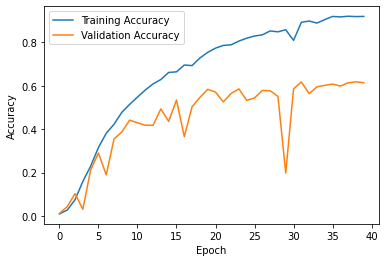

In [60]:
# Plot accuracy and validation accuracy graphs
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()